<a href="https://colab.research.google.com/github/arkothiwala/deep-learning/blob/master/AV_Intel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is solution to the AnalyticsVidya  Datahack: 
INTEL Scene Classification Challenge

[![alt text](https://datahack.analyticsvidhya.com/media/__sized__/contest_cover/1920X480_2-thumbnail-1200x1200-90.jpg)](https://datahack.analyticsvidhya.com/contest/practice-problem-intel-scene-classification-challe/)

###Download dataset

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)



**Download Training Data to CoLab**

*   Train file download on competiton page will lead to [following URL](https://drive.google.com/uc?id=10qN7OUzTutCg8ruwFosml0xzi0elsI5N&export=download)
*   URL looks something like this


---

 `https://drive.google.com/uc?id=10qN7OUzTutCg8ruwFosml0xzi0elsI5N&export=download`


---

We can download this file directly to our CoLab using  **id=10qN7OUzTutCg8ruwFosml0xzi0elsI5N** from URL






In [0]:
# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '10qN7OUzTutCg8ruwFosml0xzi0elsI5N' #File ID for the required Trainingdata
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('train-scene classification.zip')

Extract Training Data from zip File

In [0]:
import zipfile
zip_ref = zipfile.ZipFile('train-scene classification.zip', 'r')
zip_ref.extractall('data')
zip_ref.close()

Download Test data

In [19]:
testFile_url_AV = "https://datahack.analyticsvidhya.com/contest/practice-problem-intel-scene-classification-challe/download/test-file"
actual_url_AWS = "https://datahack-prod.s3.amazonaws.com/test_file/test_WyRytb0.csv"
import urllib.request
urllib.request.urlretrieve (Url, "test.csv")


('test.csv', <http.client.HTTPMessage at 0x7f8a725877b8>)

Check if GPU is running

In [86]:
from google.colab import files
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

###Exploratory Data Analysis

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate
import fastai

In [0]:
#batch size
bs = 64

In [0]:
path_img = 'data/train'
fnames = get_image_files(path_img)

In [28]:
fnames[:5]

[PosixPath('data/train/5764.jpg'),
 PosixPath('data/train/1170.jpg'),
 PosixPath('data/train/2582.jpg'),
 PosixPath('data/train/19810.jpg'),
 PosixPath('data/train/11561.jpg')]

In [0]:
data = ImageDataBunch.from_csv(path_img, ds_tfms=get_transforms(), csv_labels='../train.csv', size=150, bs=bs).normalize(imagenet_stats)

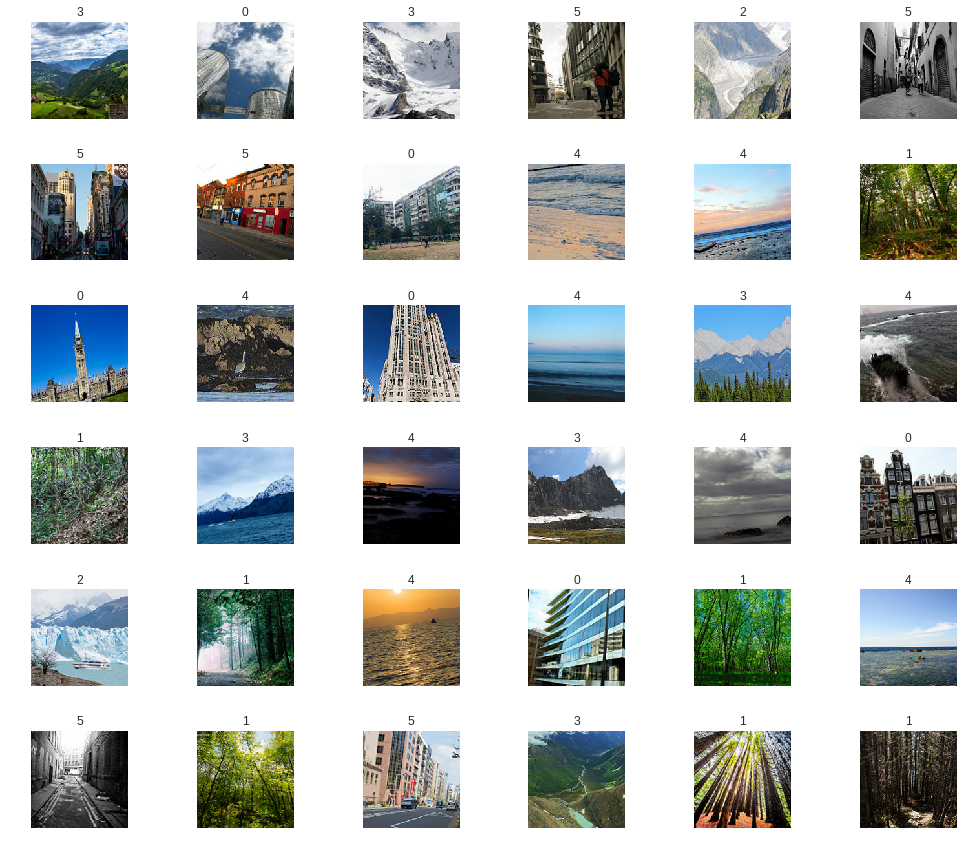

In [30]:
data.show_batch(rows=6, figsize=(14,12))

###Modelling

In [31]:
data.classes

[0, 1, 2, 3, 4, 5]

In [32]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:03<00:00, 28219896.50it/s]


In [33]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,0.466190,0.286893,0.099237
2,0.335018,0.241377,0.086025
3,0.282017,0.218601,0.079565
4,0.240092,0.212884,0.079565


In [34]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,0.257466,0.237986,0.092190
2,0.263000,0.219487,0.080153
3,0.227852,0.189432,0.071345
4,0.203729,0.188289,0.068409


In [0]:
learn.save('stage-1')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

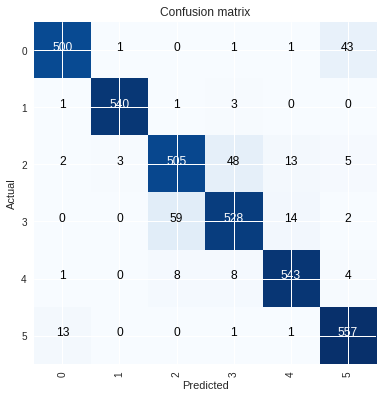

In [37]:
interp.plot_confusion_matrix()

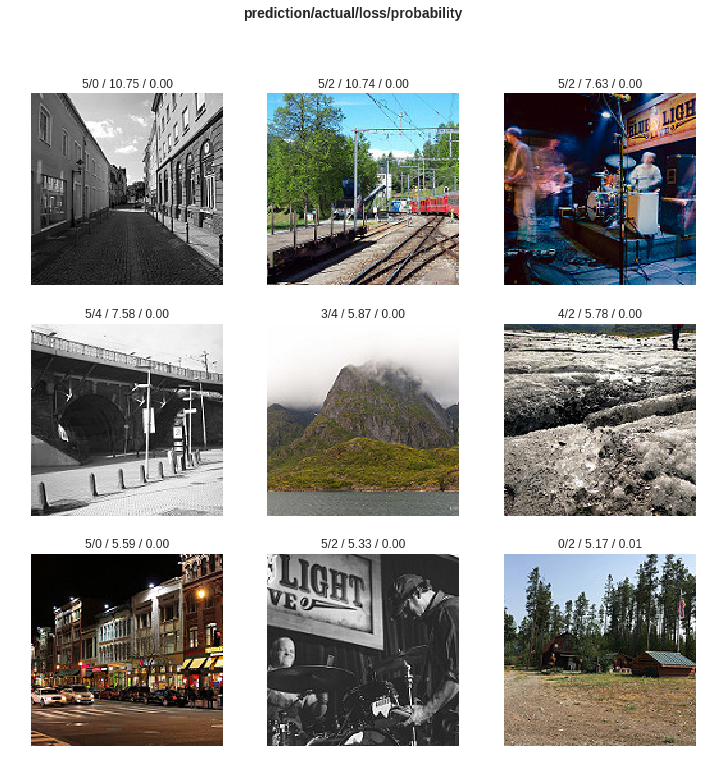

In [38]:
interp.plot_top_losses(9)

In [39]:
interp.y_true

tensor([4, 4, 1,  ..., 3, 1, 0])

In [79]:
help(ImageDataBunch.from_df)

Help on method from_df in module fastai.vision.data:

from_df(path:Union[pathlib.Path, str], df:pandas.core.frame.DataFrame, folder:Union[pathlib.Path, str]='.', label_delim:str=None, valid_pct:float=0.2, fn_col:Union[int, Collection[int], str, Collection[str]]=0, label_col:Union[int, Collection[int], str, Collection[str]]=1, suffix:str='', **kwargs:Any) -> 'ImageDataBunch' method of builtins.type instance
    Create from a `DataFrame` `df`.



In [98]:
learn.predict(is_test=True)

TypeError: ignored

In [0]:
import pandas
test_df = pandas.read_csv('test_WyRytb0.csv')
test_df['Class'] = 0
test_data = ImageDataBunch.from_df(path_img, valid_pct=0, df=test_df, ds_tfms=get_transforms(), size=150,  bs=bs).normalize(imagenet_stats)
assert (len(test_df) == len(test_data.train_ds)), 'Dimention Mismatch between ImageDataBunch size: {} and test dataframe size: {}, check validation split'.format(len(test_df), len(test_data.train_ds))

In [136]:
learn.predict(test_data.train_ds.x)

AttributeError: ignored

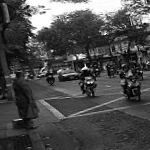

In [122]:
test_data.train_ds[0][0]

ImageItemList (7301 items)
[Image (3, 150, 150), Image (3, 150, 150), Image (3, 150, 150), Image (3, 150, 150), Image (3, 150, 150)]...
Path: data/train

In [137]:
help(learn.predict)

Help on method predict in module fastai.basic_train:

predict(item:fastai.core.ItemBase, **kwargs) method of fastai.basic_train.Learner instance
    Return predicted class, label and probabilities for `item`.



In [140]:
learn.model.eval(test_data.train_ds)

TypeError: ignored

In [142]:
learn.validate(test_data.train_ds)

AttributeError: ignored

In [0]:
preds = get_preds(learn.model,test_data.train_dl)

In [157]:
preds[0]

tensor([[-4.6294, -0.9721,  3.5812,  7.1500, -2.0211, -4.1311],
        [ 5.2563, -3.9374, -2.1923, -3.0003, -3.1184,  6.8931],
        [-4.0787, -2.3352, -1.0923, -1.6733, 10.5116, -4.8356],
        ...,
        [-2.4591, -2.5077,  3.1769,  5.3042,  0.6198, -5.1006],
        [-6.8763, -3.9612,  7.7932,  1.1141, -3.3256, -2.8118],
        [-0.5544,  7.9262, -0.3097, -3.2771, -2.0801, -1.3490]])

In [158]:
help(get_preds)

Help on function get_preds in module fastai.basic_train:

get_preds(model:torch.nn.modules.module.Module, dl:torch.utils.data.dataloader.DataLoader, pbar:Union[fastprogress.fastprogress.MasterBar, fastprogress.fastprogress.ProgressBar, NoneType]=None, cb_handler:Union[fastai.callback.CallbackHandler, NoneType]=None, activ:torch.nn.modules.module.Module=None, loss_func:Union[Callable[[torch.Tensor, torch.Tensor], OneEltTensor], NoneType]=None, n_batch:Union[int, NoneType]=None) -> List[torch.Tensor]
    Tuple of predictions and targets, and optional losses (if `loss_func`) using `dl`, max batches `n_batch`.



In [159]:
test_data.train_dl

DeviceDataLoader(dl=<torch.utils.data.dataloader.DataLoader object at 0x7f89e0100470>, device=device(type='cuda'), tfms=[functools.partial(<function _normalize_batch at 0x7f89e364bd90>, mean=tensor([0.4850, 0.4560, 0.4060]), std=tensor([0.2290, 0.2240, 0.2250]), do_x=True, do_y=False)], collate_fn=<function data_collate at 0x7f89e4613c80>)

In [0]:
data.test_dl = test_data.train_dl

In [163]:
# Preds will contain final layer softmax output and actual labels
preds = learn.get_preds(ds_type=DatasetType.Test)
# Now in order to find respective label, we will need to determine class from argmax for each row
pred_classes = torch.max(preds[0],1)[1]

[tensor([[2.9469e-06, 9.9970e-01, 7.9868e-05, 1.7064e-04, 4.7742e-05, 2.3341e-06],
         [9.8857e-01, 1.3280e-05, 8.8434e-04, 3.5369e-03, 4.9211e-04, 6.5046e-03],
         [9.9647e-01, 1.4818e-04, 2.1648e-03, 1.5235e-04, 1.1766e-04, 9.4502e-04],
         ...,
         [5.3016e-02, 1.7528e-01, 6.5361e-02, 6.2853e-01, 7.6611e-02, 1.2046e-03],
         [5.2160e-03, 9.7487e-01, 8.4795e-03, 1.8201e-04, 8.2293e-04, 1.0428e-02],
         [1.9722e-03, 1.7234e-07, 2.8096e-07, 2.8301e-07, 2.4922e-07, 9.9803e-01]]),
 tensor([0, 0, 0,  ..., 0, 0, 0])]

In [164]:
learn.get_preds(ds_type=DatasetType.Train)

[tensor([[7.4728e-05, 9.9963e-01, 5.0384e-05, 2.3818e-04, 2.0714e-06, 1.4857e-06],
         [1.1790e-05, 9.9788e-01, 1.5171e-03, 3.3074e-04, 2.3690e-04, 1.9139e-05],
         [2.0873e-04, 7.8349e-04, 8.2036e-01, 1.7540e-01, 3.0961e-03, 1.5185e-04],
         ...,
         [6.4561e-07, 9.9996e-01, 1.0393e-05, 2.5115e-05, 5.2130e-07, 1.5240e-07],
         [9.6825e-01, 3.2272e-05, 3.9389e-04, 3.7708e-04, 1.2524e-04, 3.0817e-02],
         [2.1937e-03, 9.0585e-03, 6.7576e-01, 3.0581e-01, 6.7387e-03, 4.3659e-04]]),
 tensor([1, 1, 2,  ..., 1, 0, 3])]

In [0]:
import torch

In [173]:
vals = torch.max(preds[0],0)

TypeError: ignored

In [186]:
torch.max(preds[0],1)[1]

tensor([3, 5, 4,  ..., 3, 2, 1])

In [182]:
len(test_data.train_ds)

7301